In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [3]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [4]:
cohort = "vitamin_test"

data_method = "eval_single"
eval_method = "eval_nominal"

scene = "mid_gate"

courses = [
    "traverse",
    ]   

roster = [
    # "Maverick",
    # "Rooster",
    "hsCameron"
    ]

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

In [ ]:
# First Stage Training
tp.train_roster(cohort,roster,"histNet",100,regen=False)

pl.plot_losses(cohort,roster,"histNet",use_log=True)

======================================================================
Cohort : vitamin_test           Network: commNet
======================================================================
----------------------------------------------------------------------
Student: hsCameron  | Epochs: 140   | Data Size: 275.0/275.0                  
Time: 0h 0m 23s     | Train: 0.0028 | Test: 0.0025
======================================================================

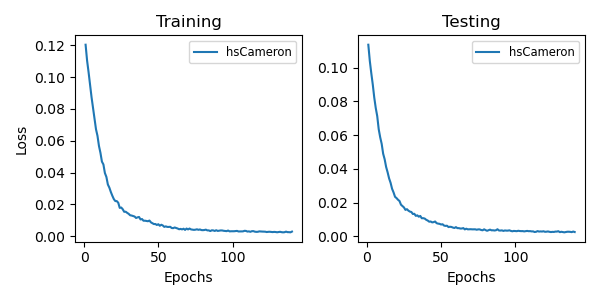

In [5]:
# # Second Stage Training
# tp.train_roster(cohort,roster,"commNet",100,regen=False)

pl.plot_losses(cohort,roster,"commNet",use_log=False)

In [ ]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)